In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Source 1:

In [2]:

# Load the csv data files
data_source_1 = 'output_data/data_source_1.csv'
data_source_2 = 'output_data/data_source_2.csv'
data_source_3 = 'output_data/data_source_3.csv'

# Read the Covid-19 data and study the results
data_1 = pd.read_csv(data_source_1)
data_2 = pd.read_csv(data_source_2)
data_3 = pd.read_csv(data_source_3)

# Change the date to data/time format for plotting
data_1['date'] = pd.to_datetime(data_1['date'])
data_2['date'] = pd.to_datetime(data_2['date'])
data_3['date'] = pd.to_datetime(data_3['date'])


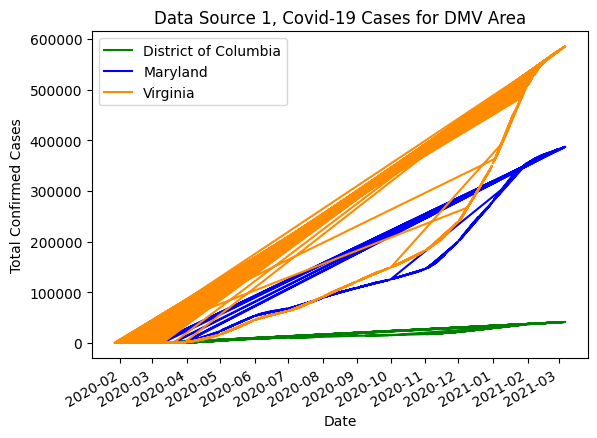

In [3]:
# Generate a line plot of date versus positive cases for each of the 6 different states 
dc1 = data_1.loc[data_1['state'] == 'Washington DC']
md1 = data_1.loc[data_1['state'] == 'Maryland']
va1 = data_1.loc[data_1['state'] == 'Virginia']

# Plot each state separately on same graph
plt.plot(dc1['date'], dc1['positive cases'], color='green', label='District of Columbia')
plt.plot(md1['date'], md1['positive cases'], color='blue', label='Maryland')
plt.plot(va1['date'], va1['positive cases'], color='darkorange', label='Virginia')

# Define labels of plot
plt.title('Data Source 1, Covid-19 Cases for DMV Area')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(loc="best")

# Set x-axis ticks to month & year
locator = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# Save the line plot to a PNG file
plt.savefig('output_data/DataSource1.png')

plt.show()

## Data Source 2:

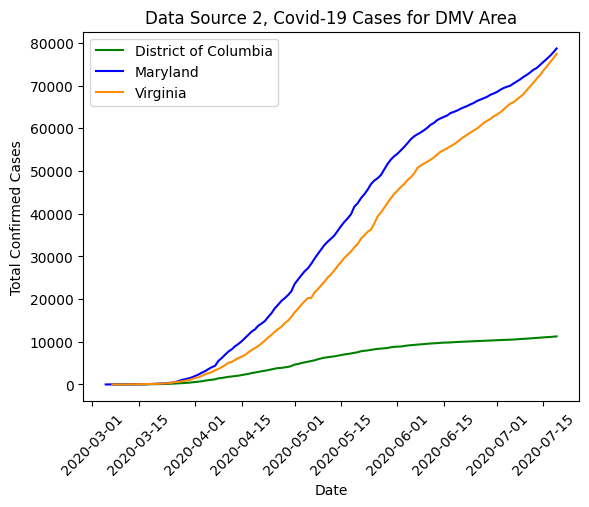

In [4]:
dc2 = data_2.loc[data_2['state'] == 'District of Columbia']
md2 = data_2.loc[data_2['state'] == 'Maryland']
va2 = data_2.loc[data_2['state'] == 'Virginia']

# Plot each state separately on same graph
plt.plot(dc2['date'], dc2['positive cases'], color='green', label='District of Columbia')
plt.plot(md2['date'], md2['positive cases'], color='blue', label='Maryland')
plt.plot(va2['date'], va2['positive cases'], color='darkorange', label='Virginia')

# Define labels of plot
plt.title('Data Source 2, Covid-19 Cases for DMV Area')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(loc="best")

# Save the line plot to a PNG file
plt.savefig('output_data/DataSource2.png')

plt.show()

## Data Source 3:

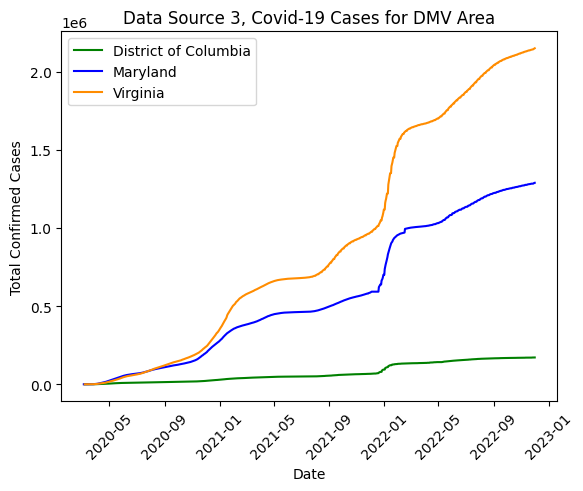

In [5]:
# Generate a line plot of date versus positive cases for each of the 6 different states 
dc3 = data_3.loc[data_3['state'] == 'District of Columbia']
md3 = data_3.loc[data_3['state'] == 'Maryland']
va3 = data_3.loc[data_3['state'] == 'Virginia']

# Plot each state separately on same graph
plt.plot(dc3['date'], dc3['positive cases'], color='green', label='District of Columbia')
plt.plot(md3['date'], md3['positive cases'], color='blue', label='Maryland')
plt.plot(va3['date'], va3['positive cases'], color='darkorange', label='Virginia')

# Define labels of plot
plt.title('Data Source 3, Covid-19 Cases for DMV Area')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(loc="best")

# Save the line plot to a PNG file
plt.savefig('output_data/DataSource3.png')

plt.show()

#### I concluded that there were only minimal inconsistencies in the three data sources, as indicated by the nearly identical appearances of the 3 line graphs when overlaid upon each other. 

### Second Objective: What percentage of population was tested and how much does testing vary from the three state? Does the testing percentages correlate to Covid-19 count?

To examine these aspects of the data, we compared the state populations in a histogram and then plotted the percentage of each states population that was tested over time.

We then ran a linear regression to see how closely the average testing percentage of each state correlates to the average daily Covid-19 count. 

In [6]:
state_population = pd.read_csv('output_data/state_pop_df.csv')
state_population

,state,population
0,District of Columbia,684498
1,Maryland,6003435
2,Virginia,8413774


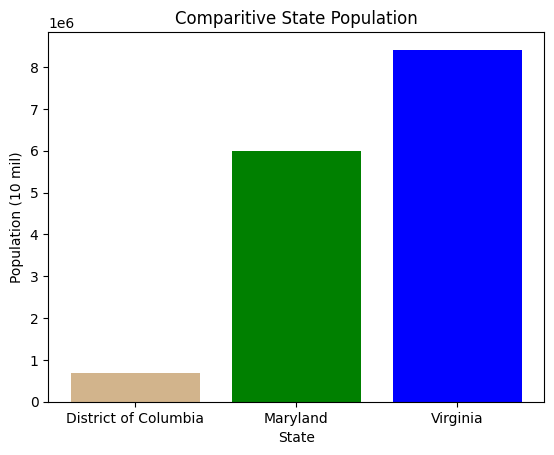

In [7]:
# Create bar graph of comparative state population
plt.bar(state_population['state'], state_population['population'], 
        color=['tan', 'green', 'blue'])
plt.title('Comparitive State Population')
plt.xlabel('State')
plt.ylabel('Population (10 mil)')

# Save the bar graph to a PNG file
plt.savefig('output_data/StatePopulation.png')

plt.show()

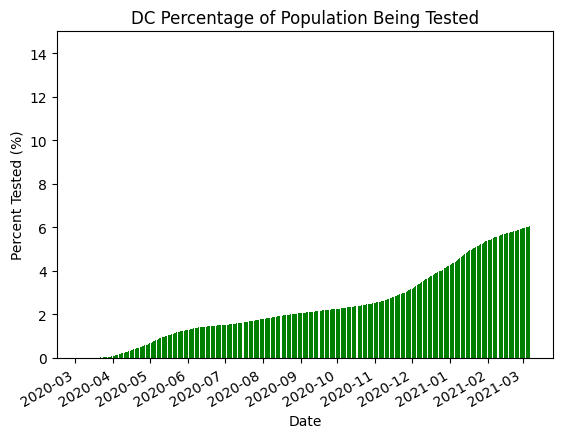

In [8]:
# Run calculations for bar graph variables
dc_tested = dc1['positive cases'] + dc1['negative cases']
dc_population = state_population.iloc[0]['population']
dc_percentage = (dc_tested / dc_population) * 100
dc_avg = dc_percentage.mean()

# Set title, axis labels, y-axis limits 
plt.bar(dc1['date'], dc_percentage, color='green')
plt.xticks(rotation=45)
plt.ylim(0, 15, 5)
plt.title('DC Percentage of Population Being Tested')
plt.xlabel('Date')
plt.ylabel('Percent Tested (%)')

# Set x-axis ticks to month & year
locator = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# Save the bar graph to a PNG file
plt.savefig('output_data/DCPercentTested.png')

plt.show()

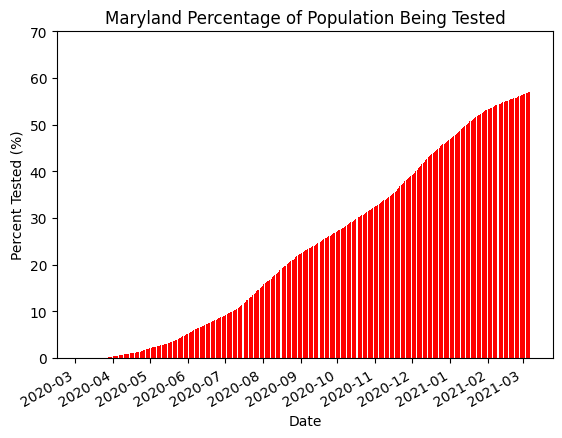

In [9]:
# Run calculations for bar graph variables
md_tested = md1['positive cases'] + md1['negative cases']
md_population = state_population.iloc[1]['population']
md_percentage = (md_tested / md_population) * 100
md_avg = md_percentage.mean()

# Set title, axis labels, y-axis limits 
plt.bar(md1['date'], md_percentage, color='red')
plt.xticks(rotation=45)
plt.ylim(0, 70, 5)
plt.title('Maryland Percentage of Population Being Tested')
plt.xlabel('Date')
plt.ylabel('Percent Tested (%)')

# Set x-axis ticks to month & year
locator = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# Save the bar graph to a PNG file
plt.savefig('output_data/MarylandPercentTested.png')

plt.show()

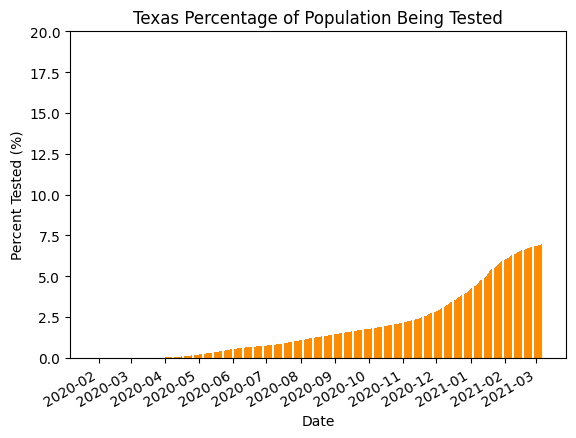

In [10]:
# Run calculations for bar graph variables
va_tested = va1['positive cases'] + va1['negative cases']
va_population = state_population.iloc[2]['population']
va_percentage = (va_tested / va_population) * 100
va_avg = va_percentage.mean()

# Set title, axis labels, y-axis limits
plt.bar(va1['date'], va_percentage, color='darkorange')
plt.xticks(rotation=45)
plt.ylim(0, 20, 5)
plt.title('Texas Percentage of Population Being Tested')
plt.xlabel('Date')
plt.ylabel('Percent Tested (%)')

# Set x-axis ticks to month & year
locator = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# Save the bar graph to a PNG file
plt.savefig('output_data/TexasPercentTested.png')

plt.show()

I then calculated the correlation coefficient and ran a linear regression to see how closely the average testing percentage of each state correlates to the average daily Covid-19 count.

I manipulated the data from source 1 to show new daily Covid-19 cases rather than total cases. I then created line graphs of date versus new daily counts. I then looked at the line graphs to see if there were any trends and considered these trends against state mandates or reopening phases that were being implemented at the time. 

In [11]:
# Separate each state from the original data frame and create a new column that displays the daily new Covid-19 cases for each state
dccount = data_1.loc[data_1['state'] == 'Washington DC']
mdcount = data_1.loc[data_1['state'] == 'Maryland']
vacount = data_1.loc[data_1['state'] == 'Virginia']

# Subtract the current days total positive cases from next days total positive cases 
DCdaily_count = dccount['positive cases'].diff()
MDdaily_count = mdcount['positive cases'].diff()
VAdaily_count = vacount['positive cases'].diff()

# Add the new daily count list to each states data frame
dccount.insert(3, "Daily Count", DCdaily_count, True)
mdcount.insert(3, "Daily Count", MDdaily_count, True)
vacount.insert(3, "Daily Count", VAdaily_count, True)



In [12]:
# Replace any NaN values with zero
dccount['Daily Count'] = dccount['Daily Count'].fillna(0)
dccount['Daily Count'] = dccount['Daily Count'].astype(int)

mdcount['Daily Count'] = mdcount['Daily Count'].fillna(0)
mdcount['Daily Count'] = mdcount['Daily Count'].astype(int)

vacount['Daily Count'] = vacount['Daily Count'].fillna(0)
vacount['Daily Count'] = vacount['Daily Count'].astype(int)


### Below, the code creates a new data frame that generated a CSV file for the analysis in our second and third objectives. 

Create a new data frame that contains all of the states daily Covid-19 counts for future statistical analysis.

In [13]:
# Group each states daily count data frames into a list
dfs = [dccount, mdcount, vacount]

# Create an empty data frame with all columns and rows
cols, rows = [], []
for df_i in dfs:
    cols = cols + df_i.columns.tolist()
    rows = rows + df_i.index.tolist()
cols = np.unique(cols)
rows = np.unique(rows)       
df = pd.DataFrame(data=np.NaN, columns=cols, index=rows) 

# Fill the data frame
for df_i in dfs:
    df.loc[df_i.index, df_i.columns] = df_i.values
df

,Daily Count,date,negative cases,positive cases,state
0,0.0,2021-01-01 00:00:00,2538142.0,280219.0,Maryland
1,26455.0,2021-01-10 00:00:00,2636065.0,306674.0,Maryland
2,3012.0,2021-01-11 00:00:00,2649578.0,309686.0,Maryland
3,2665.0,2021-01-12 00:00:00,2658742.0,312351.0,Maryland
4,2516.0,2021-01-13 00:00:00,2667562.0,314867.0,Maryland
...,...,...,...,...,...
1137,52.0,2020-09-05 00:00:00,0.0,14238.0,Washington DC
1138,41.0,2020-09-06 00:00:00,0.0,14279.0,Washington DC
1139,36.0,2020-09-07 00:00:00,0.0,14315.0,Washington DC
1140,47.0,2020-09-08 00:00:00,0.0,14362.0,Washington DC


In [14]:
# Narrow the data frame to the columns of interest
DailyCount_df = pd.DataFrame({'State': df['state'], 'Date': df['date'], 'Daily_Count': df['Daily Count']})
DailyCount_df

,State,Date,Daily_Count
0,Maryland,2021-01-01 00:00:00,0.0
1,Maryland,2021-01-10 00:00:00,26455.0
2,Maryland,2021-01-11 00:00:00,3012.0
3,Maryland,2021-01-12 00:00:00,2665.0
4,Maryland,2021-01-13 00:00:00,2516.0
...,...,...,...
1137,Washington DC,2020-09-05 00:00:00,52.0
1138,Washington DC,2020-09-06 00:00:00,41.0
1139,Washington DC,2020-09-07 00:00:00,36.0
1140,Washington DC,2020-09-08 00:00:00,47.0


In [15]:
# Clean up the data frame by removing the time from the dates and changing daily count from float to integer 
DailyCount_df['Date'] = pd.to_datetime(DailyCount_df['Date']).dt.date
DailyCount_df['Daily_Count'] = DailyCount_df['Daily_Count'].astype(int)
DailyCount_df['Daily_Count'].dropna(inplace = True)
DailyCount_df = DailyCount_df.set_index('State')
DailyCount_df

,Date,Daily_Count
State,,
Maryland,2021-01-01,0
Maryland,2021-01-10,26455
Maryland,2021-01-11,3012
Maryland,2021-01-12,2665
Maryland,2021-01-13,2516
...,...,...
Washington DC,2020-09-05,52
Washington DC,2020-09-06,41
Washington DC,2020-09-07,36


In [16]:
# Save the cleaned up data frame as a new CSV file
DailyCount_df.to_csv('output_data/DailyCount.csv')

In [17]:
dailycount = pd.read_csv('output_data/DailyCount.csv')
dailycount

,State,Date,Daily_Count
0,Maryland,2021-01-01,0
1,Maryland,2021-01-10,26455
2,Maryland,2021-01-11,3012
3,Maryland,2021-01-12,2665
4,Maryland,2021-01-13,2516
...,...,...,...
1137,Washington DC,2020-09-05,52
1138,Washington DC,2020-09-06,41
1139,Washington DC,2020-09-07,36
1140,Washington DC,2020-09-08,47


In [18]:
# Remove the date column as it is unnecessary for this analysis
dailycount.drop(columns=['Date'])

# Average the daily counts per state
dailyaverage = dailycount.groupby('State').mean()['Daily_Count']
dailyaverage

State
Maryland        -452.836957
Virginia        -555.362069
Washington DC    -40.394022
Name: Daily_Count, dtype: float64

In [19]:
# Create a new data frame that summarizes average daily Covid-19 cases and testing percentages for each state
summarytable = pd.DataFrame({'State': ['Washington DC', 'Maryland', 'Virginia'],
                             'Mean Daily Count': [-40.394022, -452.836957, -555.362069],
                             'Mean Testing Percentage': [dc_avg, md_avg, va_avg]})
summarytable


,State,Mean Daily Count,Mean Testing Percentage
0,Washington DC,-40.394022,2.401817
1,Maryland,-452.836957,24.060380
2,Virginia,-555.362069,1.919958


In [20]:
# Calculate the correlation coefficient
correlation = st.pearsonr(summarytable['Mean Daily Count'], summarytable['Mean Testing Percentage'])
print(f'The correlation coefficient for average daily count and average testing percentage is {round(correlation[0],2)}.')

The correlation coefficient for average daily count and average testing percentage is -0.31.


The r-squared value is: 0.0961971478444356


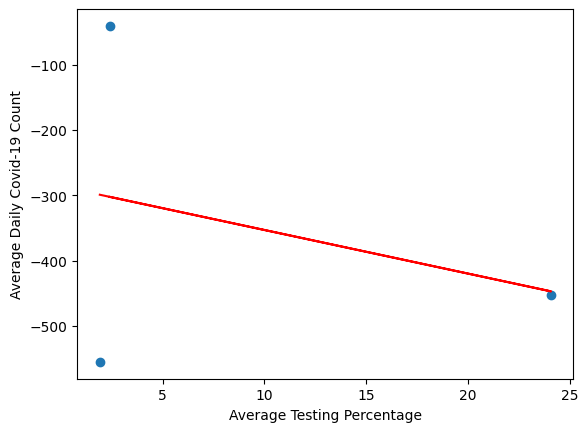

In [21]:
# Define the variables for the scatter plot
x_values = summarytable['Mean Testing Percentage']
y_values = summarytable['Mean Daily Count']

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,800),fontsize=15,color="red")

# Label plot
plt.xlabel('Average Testing Percentage')
plt.ylabel('Average Daily Covid-19 Count')

# Print r-squared value
print(f'The r-squared value is: {rvalue**2}')
    
plt.show()

The correlation coefficient between testing percentages and Covid-19 count was only -0.31, which indicates there is no relationship between the two variables. This is also demonstrated in the scatter plot where the data points are spread all over rather than being clustered in a linear fashion. The r-squared value of 0.096 indicates that only 0.96% of the movements of daily Covid-19 count (dependent variable) are explained by the movements in the testing percentage (independent variable). Thus, there is no relationship between the two at all.